In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
wave_file=r'C:\Users\Administrator\Desktop\test.wav'
sample_rate, signal= wavfile.read(wave_file)

In [3]:
type(signal)

numpy.ndarray

In [4]:
print("采样率",sample_rate)

采样率 8000


In [5]:
signal= signal[0:int(3.5*sample_rate)]
time= np.arange(len(signal))/sample_rate

Text(0.5, 1.0, 'raw waveform')

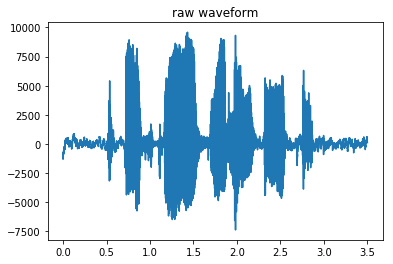

In [10]:
plt.plot(time,signal)
plt.title("raw waveform")

## 预加重

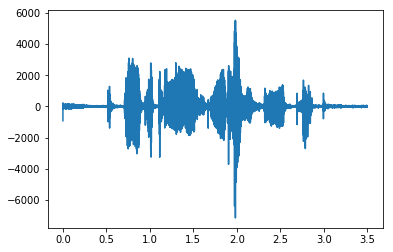

In [8]:
pre_emphasis_signal= np.append(signal[0],signal[1:]-0.97*signal[:-1])

Text(0.5, 1.0, 'pre_emphasis waveform')

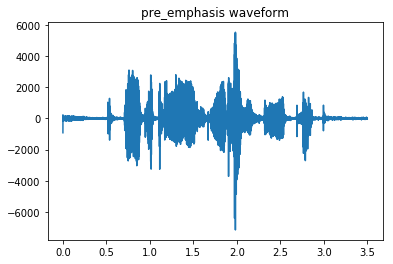

In [11]:
plt.plot(time, pre_emphasis_signal)
plt.title("pre_emphasis waveform")

In [26]:
frame_size=0.025#表示帧长
frame_stride=0.01#表示帧移
frame_len, frame_step= int(frame_size*sample_rate),int(frame_stride*sample_rate)#frame_len, frame_step分别表示一个单位帧长、帧移内的采样的数量
signal_len= len(pre_emphasis_signal)#signal_len表示信号长度
n_frames = int(np.ceil(float(np.abs(signal_len - frame_len)) / frame_step))#n_frames表示信号可以切分成多少帧，不足一帧的给弄掉

In [47]:
print("一帧的点的数量：",frame_len)
print("一个帧移的点的数量：",frame_step)
print("一段语音有多少帧：",n_frames)

一帧的点的数量： 200
一个帧移的点的数量： 80
一段语音有多少帧： 348


In [28]:
pad_signal_len= n_frames*frame_step+frame_len#加了帧移之后整个语句有多长
z= np.zeros([pad_signal_len-signal_len])#加了帧移后句子肯定变长了，计算出多了的长度
pad_signal= np.append(pre_emphasis_signal,z)#相当于做了个padding，用0补充
#这一句代码比较长，比较难懂，np.tile(array,reps)是把array复制reps的次数，reps还可以是个元组(a,b)，分别沿着行复制a次，列复制b次
#这段代码我不太理解是什么意思，好像是做一个切片
indices= np.tile(np.arange(0,frame_len),(n_frames,1))+np.tile(np.arange(0,n_frames*frame_step,frame_step),(frame_len,1)).T
frames= pad_signal[indices.astype(np.int32,copy=False)]

In [42]:
np.tile(np.arange(0,frame_len),(n_frames,1))

array([[  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199],
       ...,
       [  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199]])

In [45]:
np.tile(np.arange(0,n_frames*frame_step,frame_step),(frame_len,1)).T

array([[    0,     0,     0, ...,     0,     0,     0],
       [   80,    80,    80, ...,    80,    80,    80],
       [  160,   160,   160, ...,   160,   160,   160],
       ...,
       [27600, 27600, 27600, ..., 27600, 27600, 27600],
       [27680, 27680, 27680, ..., 27680, 27680, 27680],
       [27760, 27760, 27760, ..., 27760, 27760, 27760]])

In [43]:
trail=np.tile(np.arange(0,frame_len),(n_frames,1))

In [48]:
indices

array([[    0,     1,     2, ...,   197,   198,   199],
       [   80,    81,    82, ...,   277,   278,   279],
       [  160,   161,   162, ...,   357,   358,   359],
       ...,
       [27600, 27601, 27602, ..., 27797, 27798, 27799],
       [27680, 27681, 27682, ..., 27877, 27878, 27879],
       [27760, 27761, 27762, ..., 27957, 27958, 27959]])

In [49]:
frames

array([[-9.1900e+02, -4.2257e+02,  2.2558e+02, ...,  4.9530e+01,
         1.0324e+02,  4.9510e+01],
       [-4.6220e+01,  1.8820e+01, -3.6160e+01, ...,  4.1050e+01,
        -2.4020e+01, -1.9070e+01],
       [ 1.5450e+01, -2.7830e+01, -2.3430e+01, ..., -2.4500e+00,
         8.7220e+01,  7.6590e+01],
       ...,
       [-2.4600e+00,  3.3450e+01,  2.5440e+01, ...,  2.8500e+00,
        -4.6700e+01, -3.5750e+01],
       [-2.4380e+01, -1.0340e+01, -2.8850e+01, ...,  4.9300e+01,
         1.8590e+01,  2.8920e+01],
       [-1.7540e+01, -5.0500e+00,  4.8300e+00, ...,  4.8000e-01,
         2.5120e+01, -1.3490e+01]])

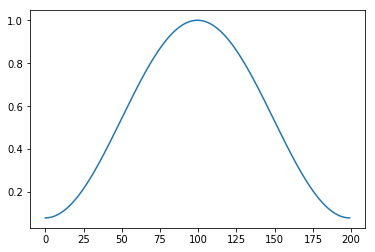

In [50]:
#加窗
plt.plot(np.hamming(frame_len))

In [52]:
frames*=np.hamming(frame_len)

In [57]:
t=np.fft.rfft(frames,512)

In [58]:
t.shape

(348, 257)

In [59]:
frames.shape

(348, 200)

In [61]:
t[0]

array([-1138.95074261+0.00000000e+00j,  -579.23604247+8.37474216e+02j,
         327.32734369+6.20416870e+02j,   332.57741559-1.68860875e+02j,
        -291.03219458-2.12741990e+02j,  -273.79106574+2.93514897e+02j,
         137.67966906+2.26197004e+02j,    57.27948449-3.41444134e+01j,
          21.92360635+6.68121373e+01j,   173.55546972-1.29709222e+02j,
        -185.80527296-3.21567884e+02j,  -357.21154188+1.15702638e+02j,
         104.99810778+2.17020693e+02j,   158.21837735-2.37652522e+02j,
        -239.83303554-3.27661921e+02j,  -445.29822334-5.54786525e+01j,
        -347.83391176+2.75023001e+02j,    41.91020197+3.40423997e+02j,
         200.94157143-1.05812982e+01j,   -32.46700006-1.80223651e+02j,
        -160.3744853 -9.51969551e+01j,  -203.11878375-1.74032863e+01j,
        -157.59802182+9.42869564e+01j,   -51.3557602 +6.42575674e+01j,
         -65.31068208+2.78538905e+01j,     3.9885115 +1.11620874e+01j,
         -52.34233001-1.67007740e+02j,  -317.20849546-8.93484066e+01j,
      

In [63]:
t1=np.absolute(t)

In [65]:
t1[0]

array([1138.95074261, 1018.27179831,  701.47008703,  372.99025789,
        360.49811741,  401.38826925,  264.80327787,   66.68418335,
         70.31718283,  216.67021807,  371.38861535,  375.48260434,
        241.08625783,  285.50267244,  406.05691639,  448.74089249,
        443.42539546,  342.99411469,  201.21997664,  183.12474026,
        186.50049813,  203.86298017,  183.64957564,   82.25842861,
         71.00228453,   11.85328725,  175.01801234,  329.55176732,
        350.19354128,  271.30589225,  214.91354467,  273.18914419,
        354.16771499,  414.29918384,  475.71541892,  478.97156791,
        458.17217682,  513.55439604,  512.21095385,  353.38429737,
        108.98342568,   93.3745357 ,  137.3574335 ,   25.33518007,
        229.63538356,  359.88909414,  315.87173166,  207.02065636,
        202.19363687,  254.88159094,  275.48146989,  194.07503656,
        109.23133132,  227.95947193,  306.75348783,  277.93113553,
        220.62756604,  264.20879495,  215.1542017 ,  168.32032

In [ ]:
NFFT= 512
mag_frames= np.absolute(np.fft.rfft(frames,NFFT))
